# High Magnification near the point caustic

In [3]:
%matplotlib notebook
from scipy.stats import binned_statistic

from scipy.special import jv,jve

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/home/calvin/wave_optics_review/text/plot_scripts/paper_sty.mplstyle')


In [4]:

journal_textwidths = {'prd': 6.50127,
                   'none': 8.5,
                   'kaobook':6.5, # just a guess
                   'issi':7.5 # just a guess
                   } # Latex's \textwidth in inches

def figsize(fraction_of_textwidth = 0.45,height_per_width  = 1 / 1.61803399,journal = 'prd'):
    textwidth = journal_textwidths[journal]
    width_in = textwidth * fraction_of_textwidth
    height_in = height_per_width * width_in
    return (width_in, height_in)




# Test Numerical Optical Depth Calculator

Make two functions (`f1_test` and `f2_test`) and integrate the optical depth out to a certain threshold value of  $|F|^2$

<IPython.core.display.Javascript object>


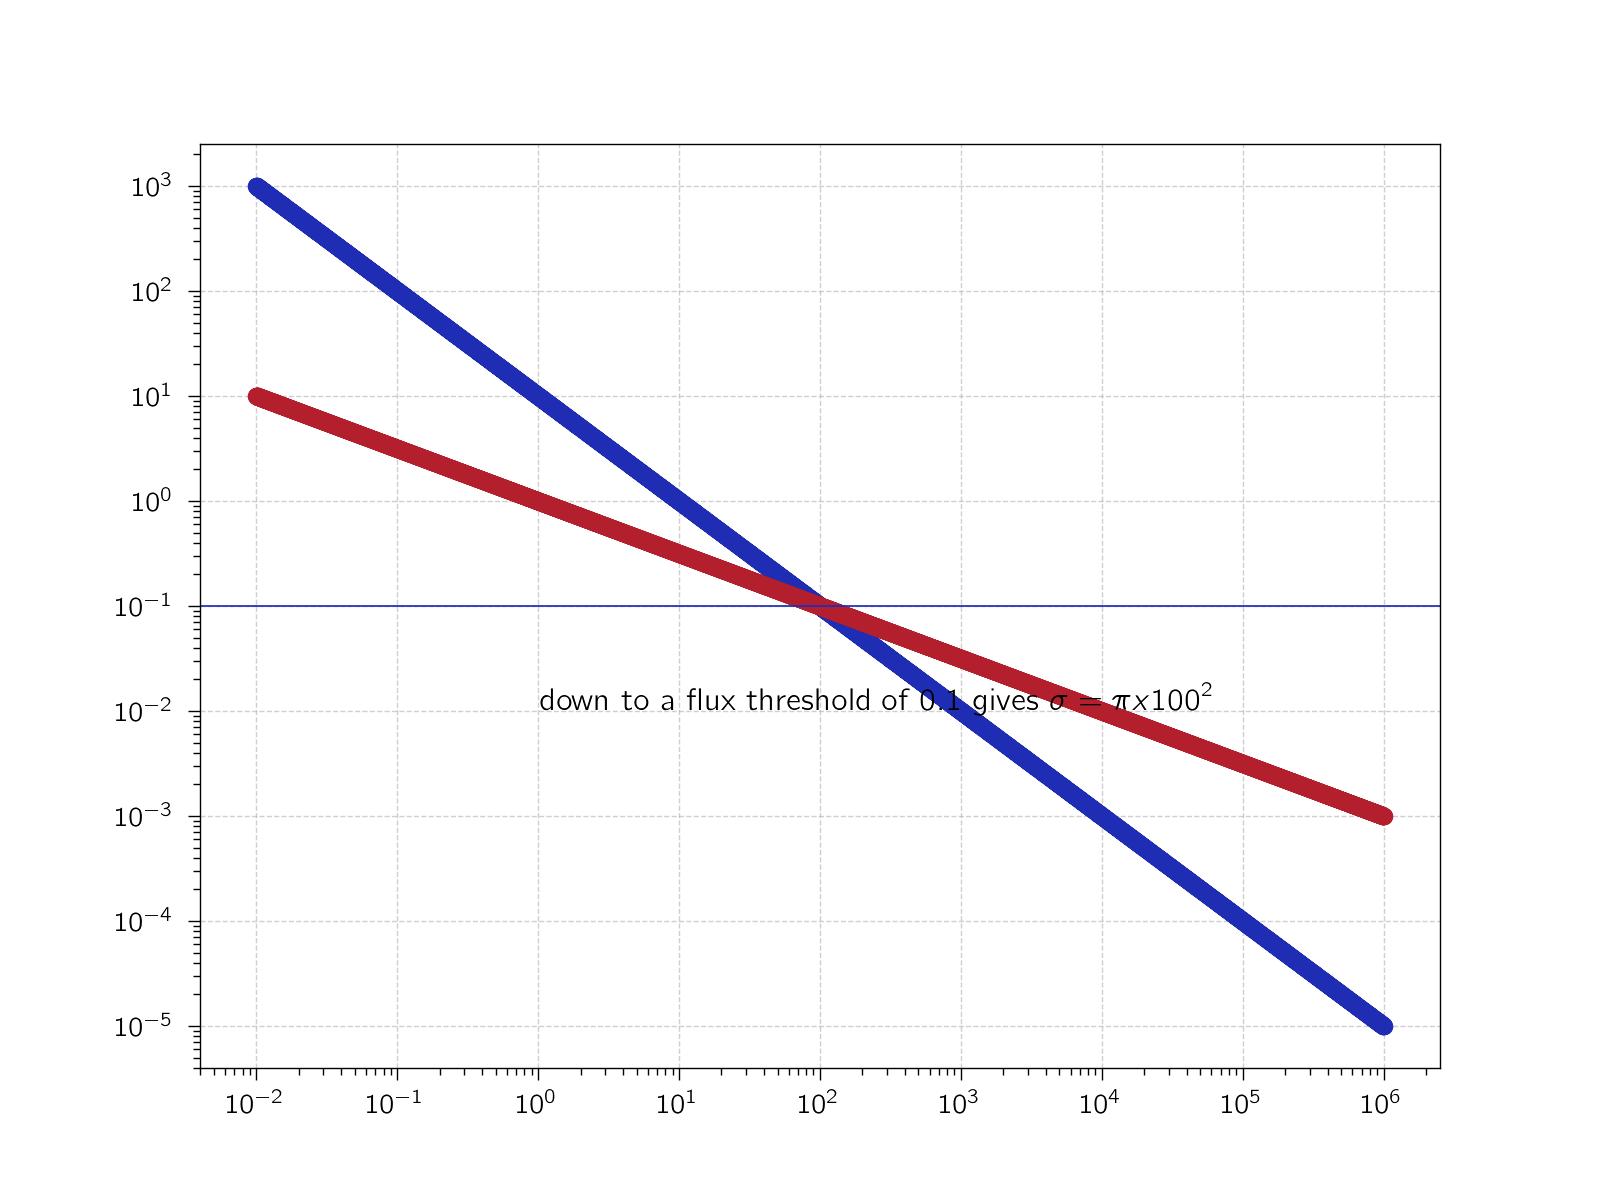

In [5]:
y = np.geomspace(1e-2,1e6,num = 1e4)
dy = np.diff(y)
y = y[1:]
f1_test = 10/y
f2_test = 1/np.sqrt(y)
th = np.geomspace(1e-2,1e6,num = 1000,endpoint=True)
plt.figure()
plt.loglog(y,f1_test,marker = 'o')
plt.loglog(y,f2_test,marker = 'o')
plt.axhline(1e-1)
plt.text(x=1,
         y=1e-2,
         s="down to a flux threshold of 0.1 gives $\sigma = \pi x 100^2$")
def integrated_sigma(th,y,fy,dy):
    """Integrates cross section to lensing"""
    sigma1 = binned_statistic(x = fy, 
                              values = 2*np.pi*y*dy , 
                              statistic = lambda y: np.nansum(y),
                              bins = th)

    sigma_valid = np.cumsum(sigma1.statistic[::-1]) # sum the dsigma values in reverse to get sigma(>threshold) instead of sigma(<threshold)
    th_min = th[:-1][::-1] # want to reverse the bins to label the threshold
    return th_min, sigma_valid # return threshold and sigma(>threshold)

th_min,s1 = integrated_sigma(th = th, y = y, dy = dy, fy = f1_test)
th_min,s2 = integrated_sigma(th = th, y = y, dy = dy, fy = f2_test)

<IPython.core.display.Javascript object>


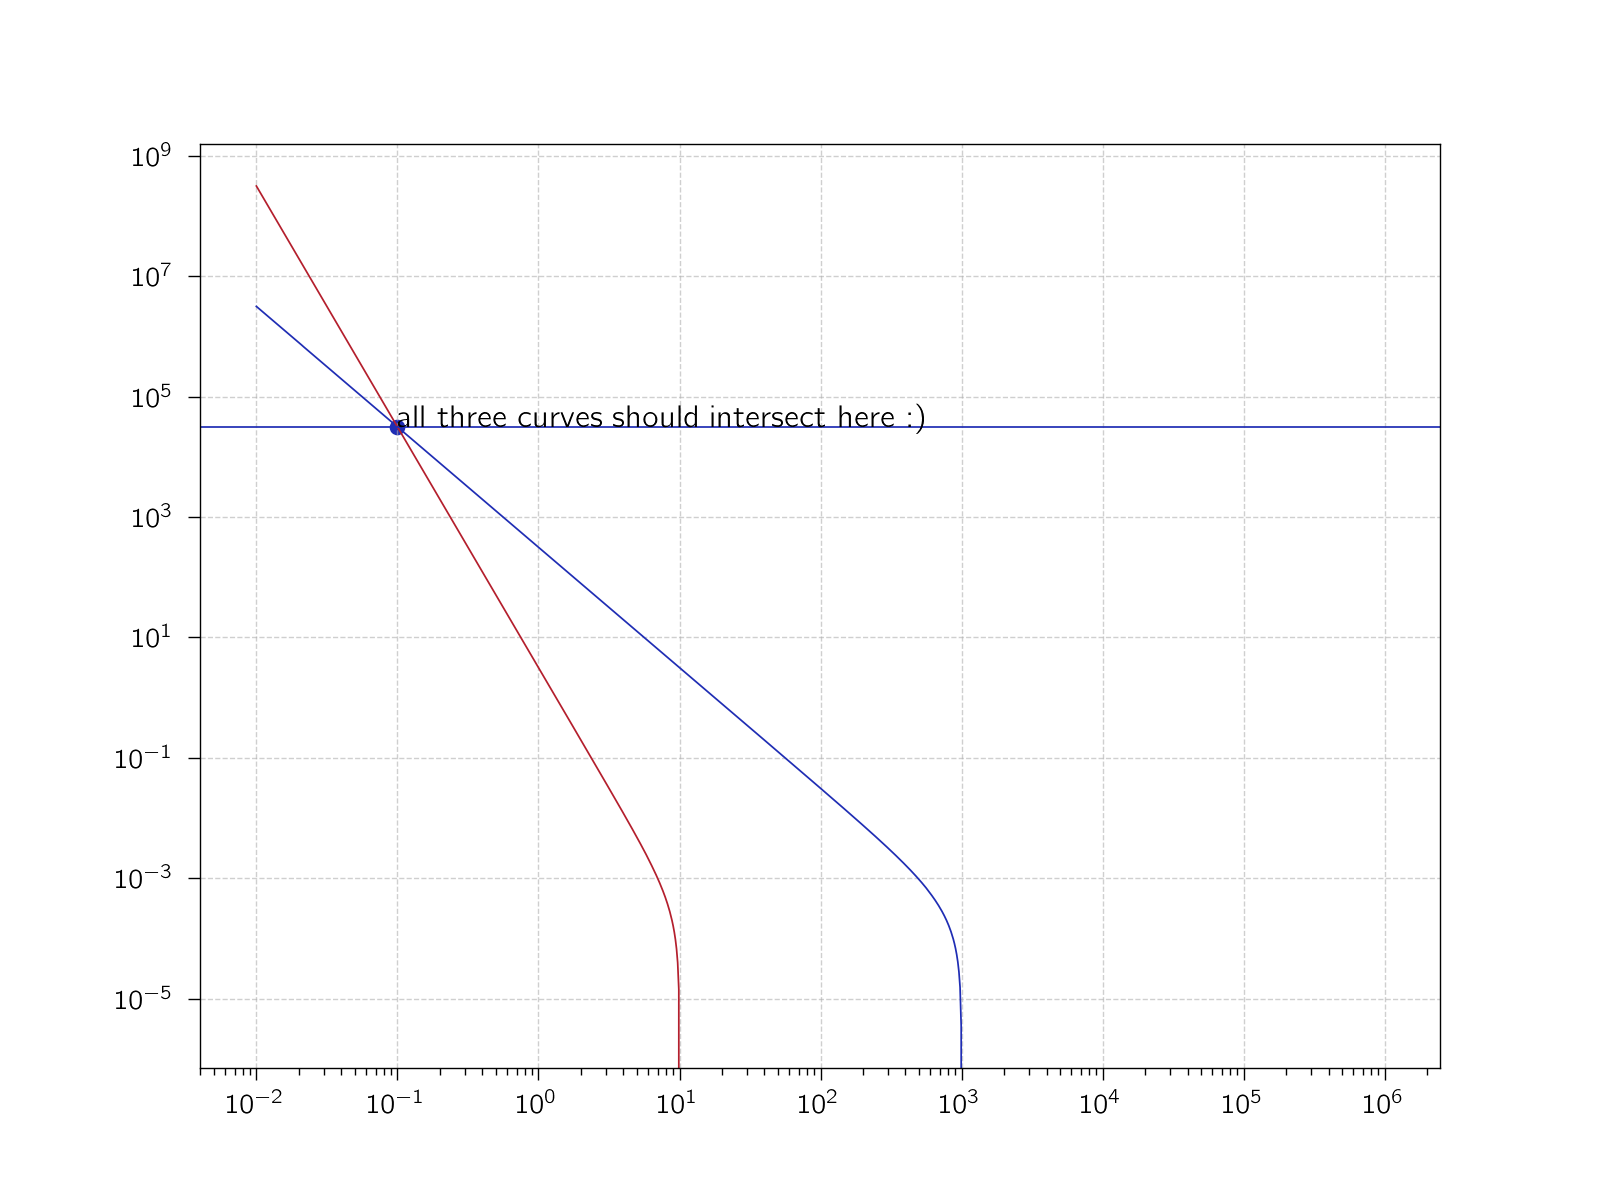

In [6]:
plt.figure()
plt.loglog(th_min,s1)
plt.loglog(th_min,s2)
plt.axhline(np.pi*100**2)
plt.text(x = 1e-1,y = np.pi*100**2,s = 'all three curves should intersect here :)')
plt.scatter([1e-1],[np.pi*100**2])

In [7]:
from mpmath import hyp1f1

<IPython.core.display.Javascript object>


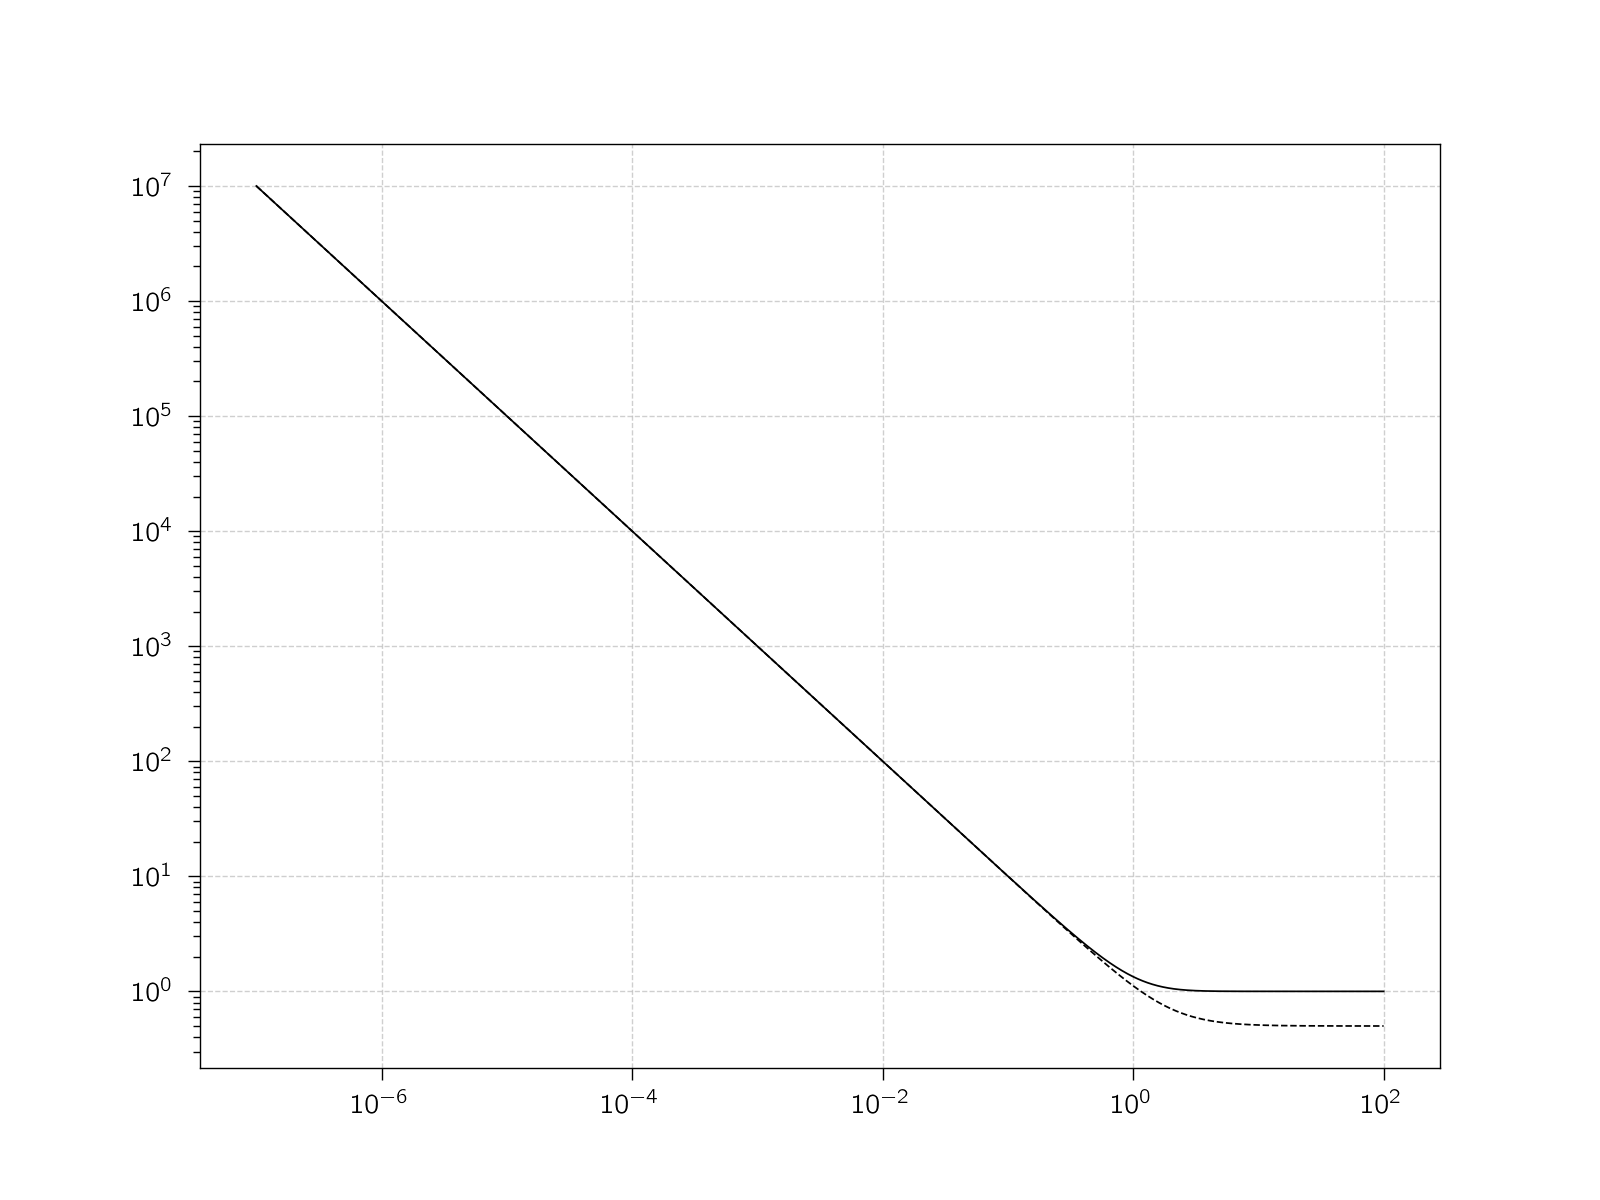

In [10]:
plt.figure()
plt.loglog(dy,f_ps_geo(dy)**2,
              color = 'black',
              label = 'Point source; Geometric',zorder=1000)
plt.loglog(dy,f2_tophat_geo(dy),
              ls = '--',color = 'black',label = 'Tophat; Geometric')


In [17]:
f_ps_wav(1e-3,1e6,x_E=1,phi_pp=2,norm=False,sign=True)**2

3860.262197849788

In [18]:
f2_ps_wav_hyp(np.array([1e-3]),1e6,x_E=1,phi_pp=2,norm=False,sign=True)

array([1930.10075215])

<IPython.core.display.Javascript object>


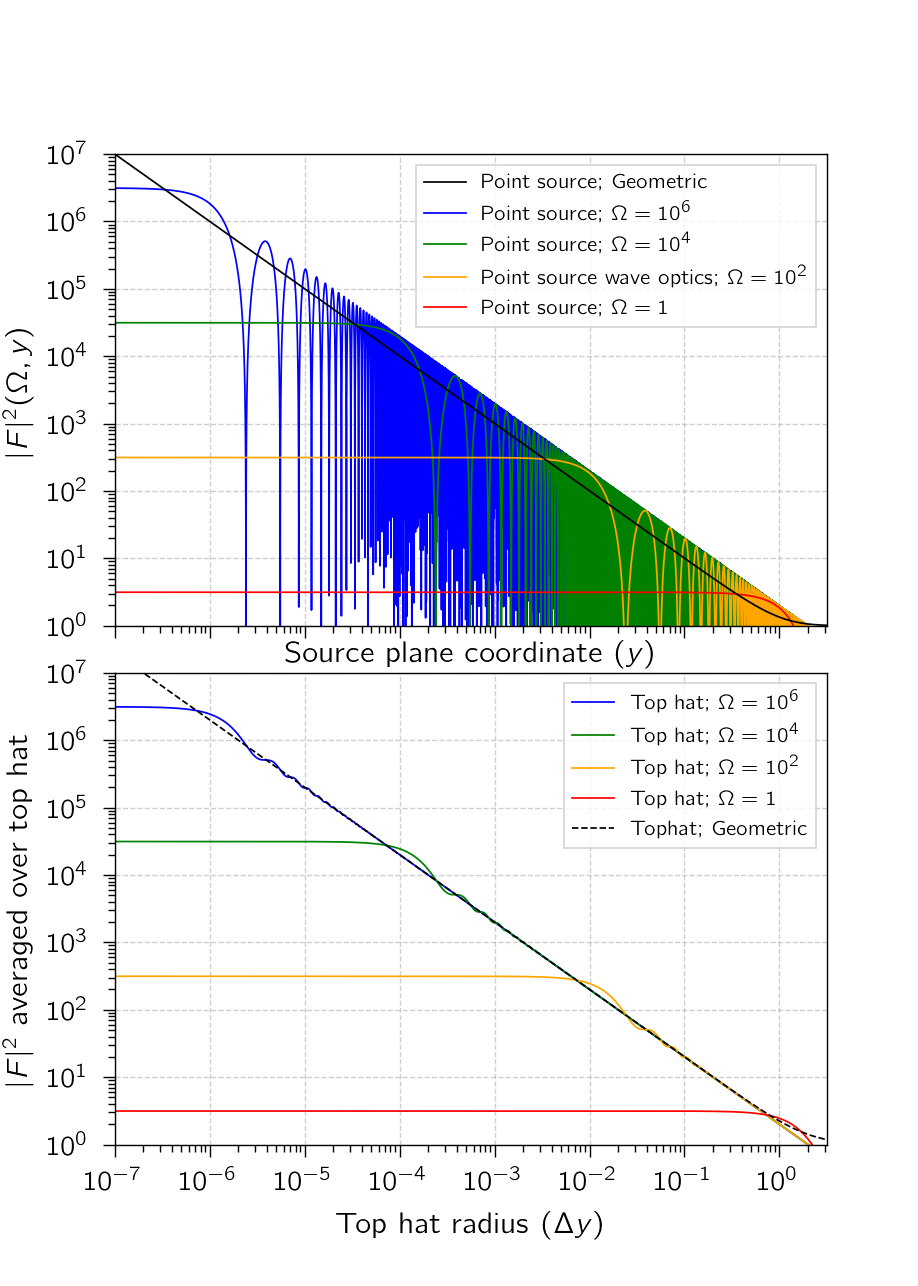

In [34]:
def f_ps_wav(y,omega,x_E,phi_pp,norm = False,sign=True):
    xi = omega*x_E*y
    f = np.sign(jv(0,xi))*np.sqrt(np.pi*jv(0,xi)**2 * xi**2 / y**2 / omega / np.abs(1 - phi_pp) )
    if norm:
        f /= np.sqrt(2*np.pi*omega * x_E**2 / np.abs(1 - phi_pp))
    if not sign:
        f = np.abs(f)
    return f

def f2_ps_wav_hyp(y,omega,x_E,phi_pp,norm=False,sign=True):
    from mpmath import hyp1f1
    temp = np.zeros(len(y))
    w = omega
    beta = y / x_E
    for i in range(len(y)):
        temp[i] = np.pi*w/(1-np.exp(-np.pi*w))*np.abs(complex(hyp1f1(complex(0,w/2.0), 1, complex(0,w/2.0)*beta[i]**2,
                                                                     maxterms = 8000)))**2
    return temp

    
def f2_tophat_wav(dy,omega,x_E,phi_pp):
    dxi = omega*x_E*dy
    return np.pi * omega * x_E**2 * (jv(0,dxi)**2 + jv(1,dxi)**2) / np.abs(1 - phi_pp)

def f_ps_geo(y):
    """ This gives us C(0) = (1 + (2/Delta y)^2)^0.5 when integrated over a top hat."""
    return np.sqrt((y**2 + 2) / y / np.sqrt(y**2 + 4))

def f2_tophat_geo(y):
    """ From Nakamura+Deguchi 2003 p.9"""
    return (1 + 4/y**2)**0.5

dy = np.logspace(-7,2,num = 20000)

x_E = 1
phi_pp = 2
f,axs =plt.subplots(figsize = figsize(fraction_of_textwidth = 0.49, height_per_width = 1.4,journal = 'issi'),
            nrows = 2, ncols = 1,sharex=True)

axs[0].loglog(dy,f_ps_geo(dy)**2,
              color = 'black',
              label = 'Point source; Geometric',zorder=1000)
axs[0].loglog(dy,f_ps_wav(dy,omega = 1e6, x_E = 1, phi_pp = 2, norm=False,sign=False)**2,
              color = 'blue',
              label = r'Point source; $\Omega = 10^6$')

axs[0].plot(dy,f_ps_wav(dy,omega = 1e4, x_E = 1, phi_pp = 2, norm=False,sign=False)**2,
              color = 'green',
              label = r'Point source; $\Omega = 10^4$')
axs[0].plot(dy,f_ps_wav(dy,omega = 1e2, x_E = 1, phi_pp = 2, norm=False,sign=False)**2,
              color = 'orange',
              label = r'Point source wave optics; $\Omega = 10^2$')
axs[0].plot(dy,f_ps_wav(dy,omega = 1, x_E = 1, phi_pp = 2, norm=False,sign=False)**2,
              color = 'red',
              label = r'Point source; $\Omega = 1$')

axs[1].loglog(dy,f2_tophat_wav(dy,omega = 1e6, x_E = 1, phi_pp = 2),
              ls= '-',color = 'blue',label = r'Top hat; $\Omega = 10^6$')
axs[1].loglog(dy,f2_tophat_wav(dy,omega = 1e4, x_E = 1, phi_pp = 2),
              ls= '-',color = 'green',label = r'Top hat; $\Omega = 10^4$')
axs[1].loglog(dy,f2_tophat_wav(dy,omega = 1e2, x_E = 1, phi_pp = 2),
              ls= '-',color = 'orange',label = r'Top hat; $\Omega = 10^2$')
axs[1].loglog(dy,f2_tophat_wav(dy,omega = 1, x_E = 1, phi_pp = 2),
              ls= '-',color = 'red',label = r'Top hat; $\Omega = 1$')
axs[1].loglog(dy,f2_tophat_geo(dy),
              ls = '--',color = 'black',label = 'Tophat; Geometric')


# FRB
#https://www.wolframalpha.com/input?i=4*pi*%28schwarzschild+radius+of+sun+*+1e-3%29+%2F+%28c+%2F+1+GHz%29
#omega_frb = 124 # 1 GHz; 1e-3 solar masses

#https://www.wolframalpha.com/input?i=%28+sqrt%282*c*%281+ms%29+*+1+parsec%29+%29+%2F+sqrt%283+km+*+1e-3+*+1+Gpc%29
#dy_frb = np.array([0.014]) # 1 Gpc lensing distance; 1e-3 M_sol lens; 0.1 pc - 1 pc screen; 1 millisecond
#plt.axvline(dy_frb,label = 'Microlensed FRB ($10^{-3} M_{\odot}$, 1 GHz, 1 Gpc)')

# GW
#https://www.wolframalpha.com/input?i=4*pi*%28schwarzschild+radius+of+sun+*+1e0%29+%2F+%28c+%2F+%281+kHz%29%29
#omega_gw = 0.123 # 1 kHz; 1 solar masses

#https://www.wolframalpha.com/input?i=%28+100+km+%29+%2F+sqrt%283+km+*+1+*+1+Gpc%29
#dy_gw = np.array([0.014]) # 1 Gpc lensing distance; 1e-3 M_sol lens; 0.1 pc - 1 pc screen; 1 millisecond
#plt.axvline(dy_frb,label = 'Microlensed FRB ($10^{-3} M_{\odot}$, 1 GHz, 1 Gpc)')

#axs[0].set_ylim(-1,1)
axs[0].set_ylim(1,1e7)
axs[1].set_ylim(1,1e7)
axs[0].set_ylabel(r'$|F|^2(\Omega,y)$')#'\sqrt{|1 - \psi''(x_E)|/2\pi\Omega x_E^2}$')
axs[1].set_ylabel(r'$|F|^2$ averaged over top hat')
axs[0].set_xlabel(r'Source plane coordinate ($y$)')
axs[1].set_xlabel(r'Top hat radius ($\Delta y$)')
axs[1].set_xlim(dy[0],np.sqrt(10))
plt.subplots_adjust(hspace=0.1)
axs[0].legend(loc='upper right')#,bbox_to_anchor = [0.9,1,0.1,0.2])
axs[1].legend(loc='upper right')#,bbox_to_anchor = [0.9,1,0.1,0.2])
plt.savefig('/home/calvin/wave_optics_review/text/figs/finite.pdf')

# How good is the Bessel approx?
Compare Nakamura Eq. 3.8 for point source to Nakamura Eq. 4.3

In [30]:
f_wav_bessel

array([1.48697511e-05, 9.17096168e-05, 1.68099468e-05, 7.25405956e-05,
       4.14210590e-05, 1.37281518e-05, 2.74488459e-05, 2.16307700e-05,
       8.13063759e-06, 4.31047716e-06, 3.22480582e-06, 2.65676830e-06,
       4.14240633e-07, 5.38297357e-08, 4.02579667e-07, 1.91274911e-07,
       6.30991312e-07, 2.78748870e-07, 4.95995960e-07, 1.41590715e-07,
       4.21304534e-09, 1.41311965e-07, 1.41666252e-07, 1.29642674e-07,
       9.39007131e-09, 5.38954926e-08, 5.14841666e-08, 3.64581299e-08,
       2.09423219e-08, 1.41708526e-08])

<IPython.core.display.Javascript object>


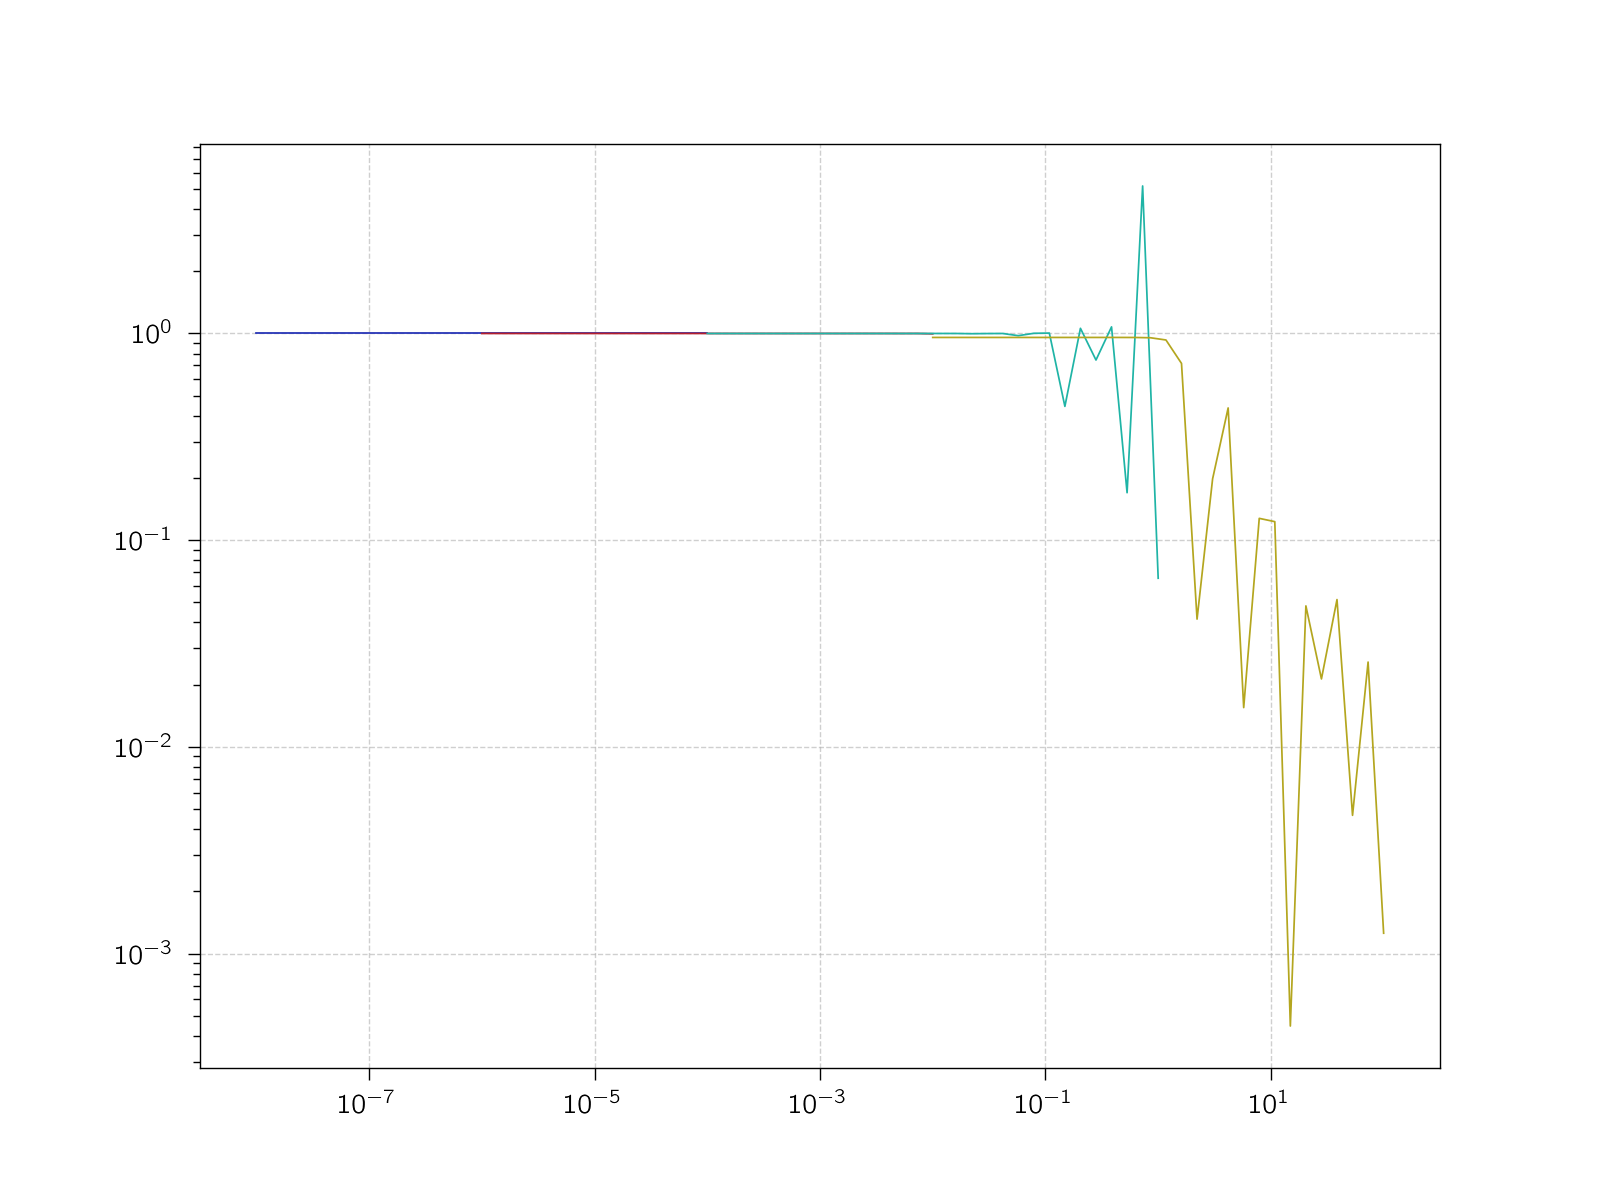

In [33]:
plt.figure()
for iiom,om,color in zip([0,1,2,3],[1e6,1e4,1e2,1],['blue','green','orange','red']):
    y = np.geomspace(0.01 / om, 100 / om, num = 30)
    f_wav_bessel = f_ps_wav(y,omega = om, x_E = 1, phi_pp = 2, norm=False,sign=False)**2
    f_wav_hyp = f2_ps_wav_hyp(y,omega = om, x_E = 1, phi_pp = 2, norm=False,sign=False)
    plt.loglog(y,f_wav_bessel / f_wav_hyp)
    

# Do the optical depth integrals
Plot the last few points of F(y) at large values of $y$ just to make sure the grid adequately samples the oscillatory integrand

<IPython.core.display.Javascript object>


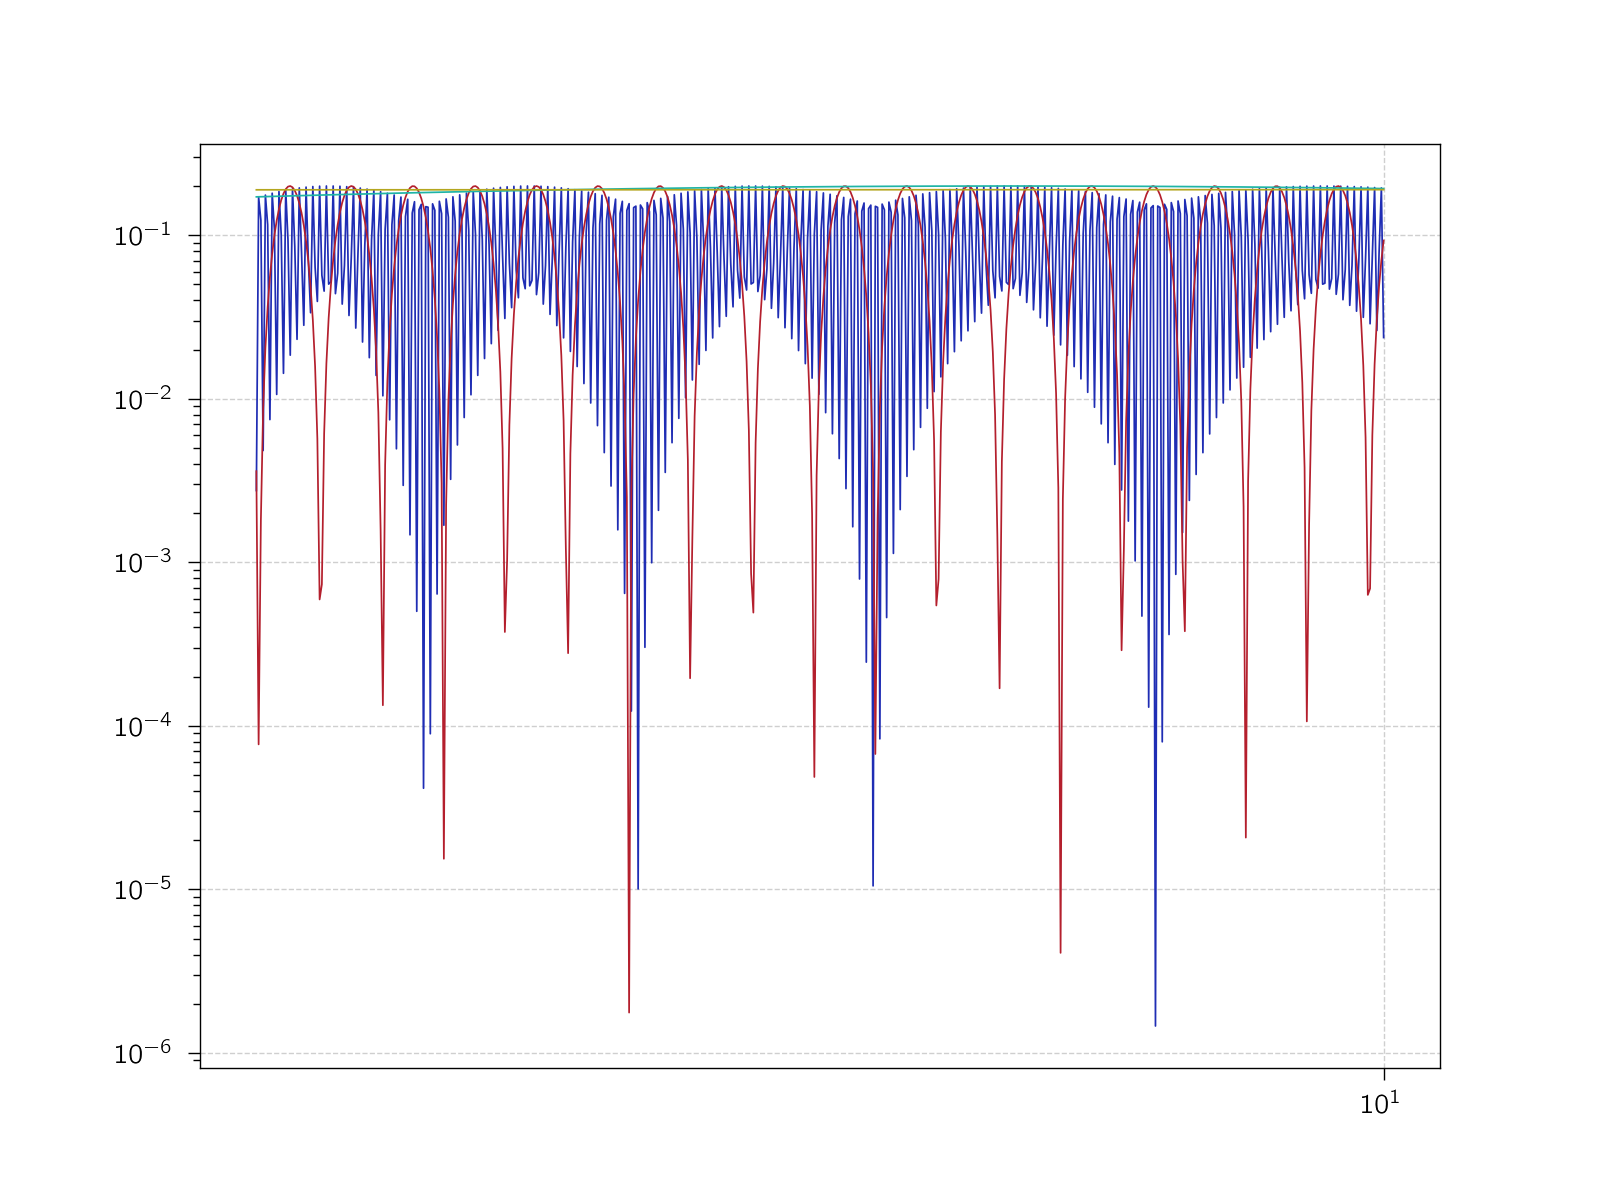

In [21]:


for y in [
            #np.linspace(1e-8,1,num = 1e6), # Linear grid sampling
            #np.geomspace(1e-8,1,num = 1e4), # Log grid sampling
            #np.geomspace(1e-8,1,num = 1e5), # Make it sparse?
            np.geomspace(1e-9,10,num = 2e7), # Keep it sparse, extent towards large y?
        ]:
    dy = np.diff(y)
    y = y[1:]
    f_geo = f_ps_geo(y)**2
    n_omega = 4
    n_threshold = 1000
    thresholds = np.geomspace(1,1e7,num = n_threshold)
    
    th_min,sigma_geo = integrated_sigma(fy = f_geo, dy = dy,y = y,th = thresholds,)
    
    sigma_wav = np.zeros((n_omega, n_threshold - 1))
    plt.figure()
    for iiom,om,color in zip([0,1,2,3],[1e6,1e4,1e2,1],['blue','green','orange','red']):
        f_wav = f_ps_wav(y,omega = om, x_E = 1, phi_pp = 2, norm=False,sign=False)**2
        #f_wav = f2_ps_wav_hyp(y,omega = om, x_E = 1, phi_pp = 2, norm=False,sign=False)

        plt.loglog(y[-500:],f_wav[-500:])
        th_min,sigma_wav[iiom,:] = integrated_sigma(fy = f_wav, dy = dy,y = y,th = thresholds,)
        
#plt.savefig('/home/calvin/wave_optics_review/text/figs/tau_ratio.pdf')

Turner 1984: https://articles.adsabs.harvard.edu/pdf/1984ApJ...284....1T
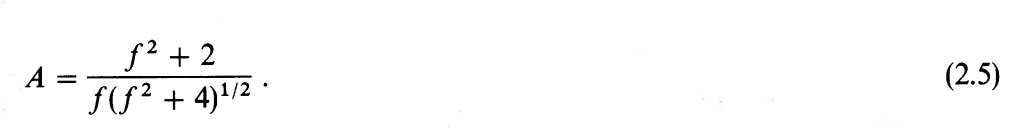

Since we want to solve for the cross section which depends only on y^2, let's write this as 

$A = \frac{y^2 + 2}{\sqrt{y^2 (y^2+4)}}$

https://www.wolframalpha.com/input?i=solve+x+%3D+%28y+%2B+2%29+%2F+%28sqrt%28y++*+%28y+%2B+4%29%29%29+for+y

Take second root:
https://www.wolframalpha.com/input?i=%282+%281+-+x%5E2+%2B+sqrt%28-x%5E2+%2B+x%5E4%29%29%29%2F%28-1+%2B+x%5E2%29&assumption=%22ClashPrefs%22+-%3E+%7B%22Math%22%7D

$$y^2 = \frac{2A}{\sqrt{A^2 - 1}} - 2$$

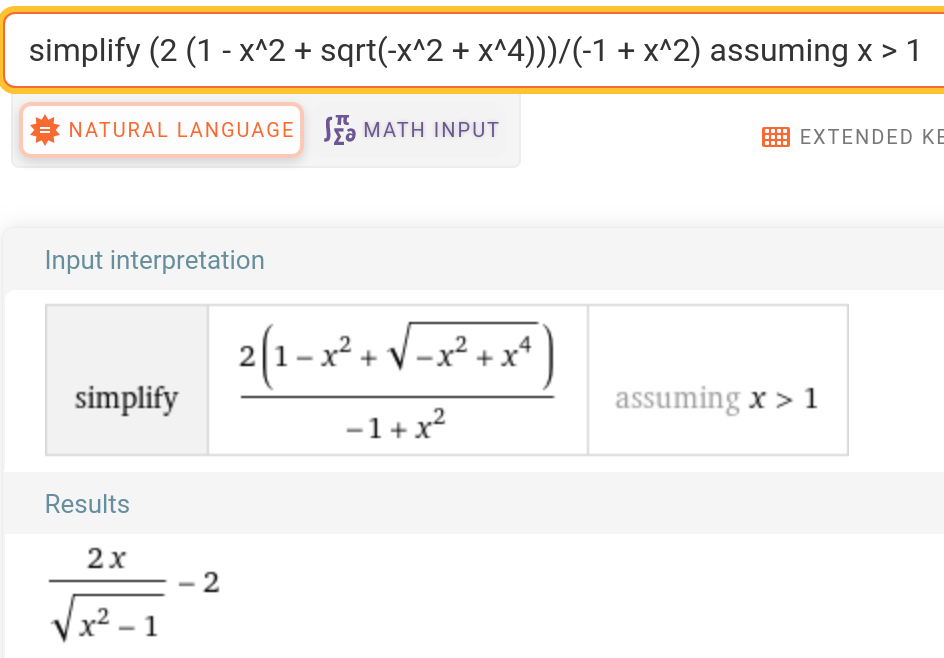

In [22]:
def sigma_geo_analytic(th):
    """ Return pi * y_threshold^2, where y_threshold is solved from the Turner 1984 eq. 2.5"""
    return np.pi*(2 * th / np.sqrt(th**2 - 1) - 2)

sigma_geo_ana = sigma_geo_analytic(th_min)

/home/calvin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


# Compare analytical cross section to numerical cross section for the geometric optics case

<IPython.core.display.Javascript object>


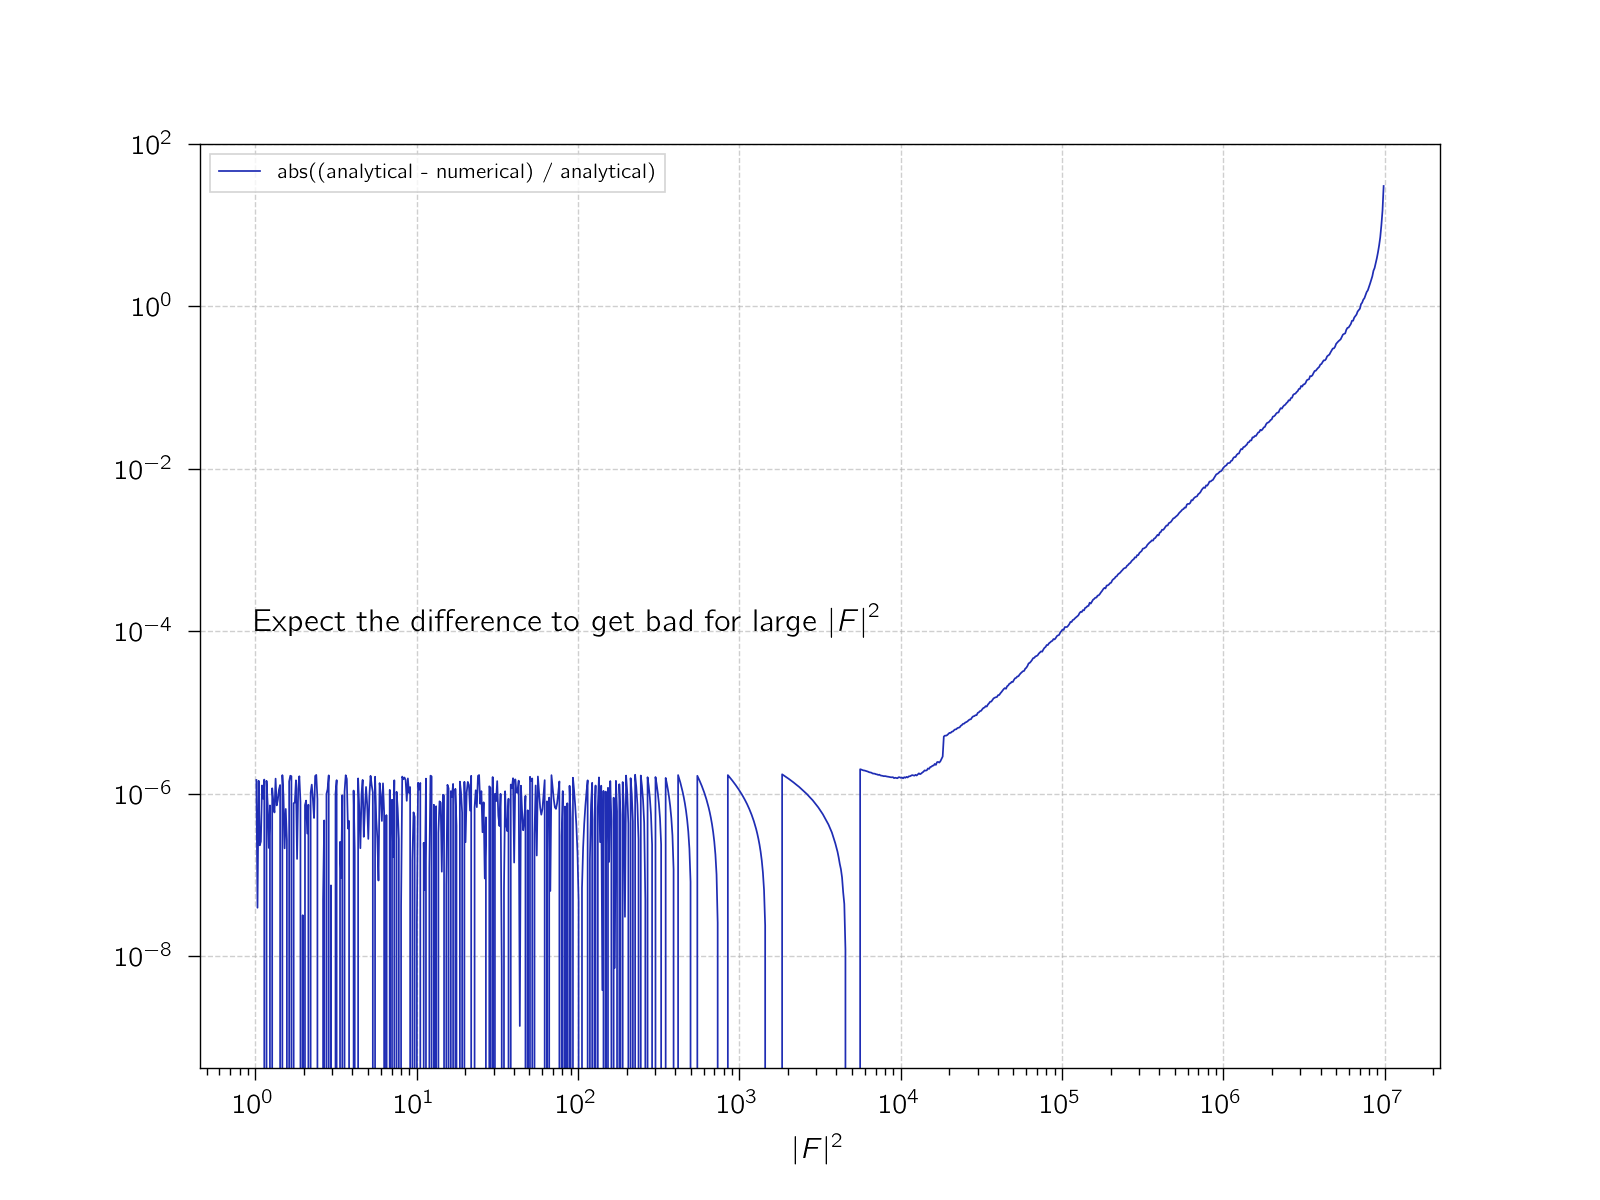

In [23]:
plt.figure()
plt.loglog(th_min,(sigma_geo_ana - sigma_geo) / np.abs(sigma_geo),label = 'abs((analytical - numerical) / analytical)')
plt.text(x = 1, y = 1e-4,s = r"Expect the difference to get bad for large $|F|^2$")
plt.xlabel(r'$|F|^2$')
plt.legend()

<IPython.core.display.Javascript object>


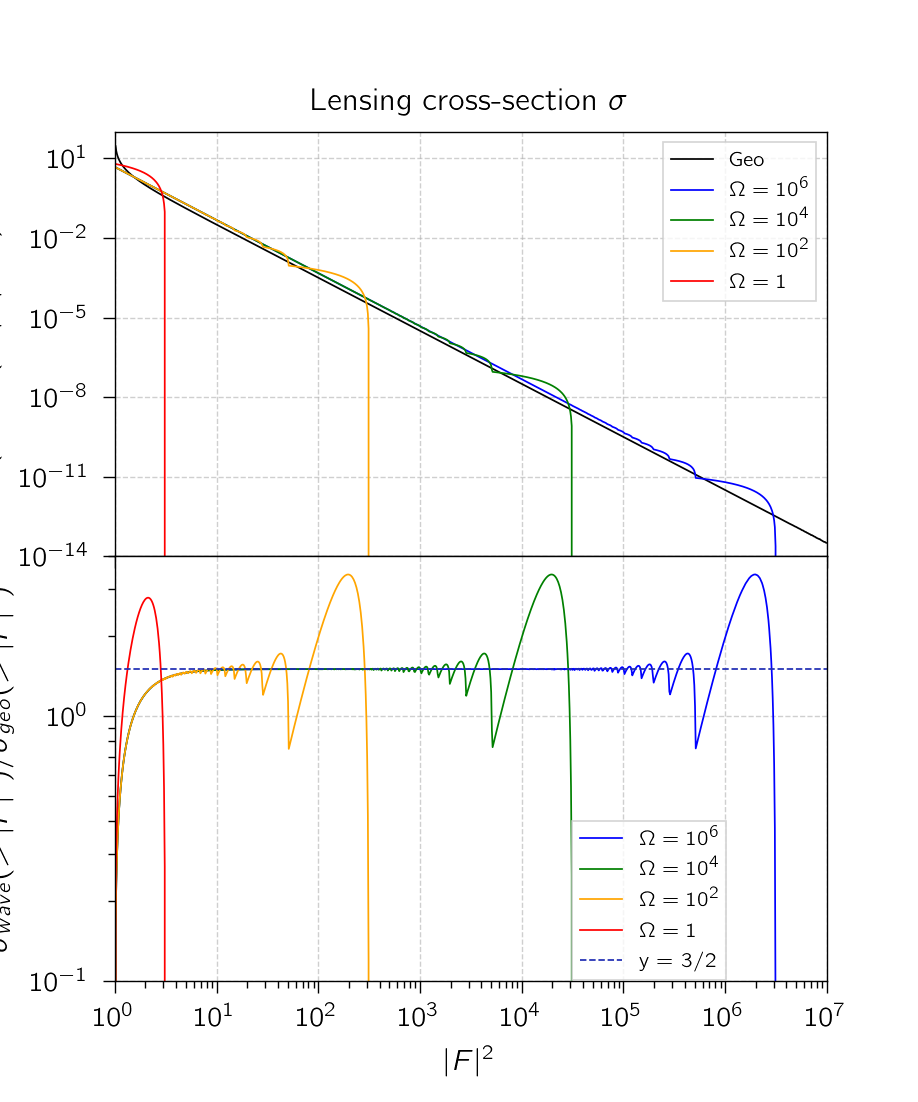

In [24]:
### PLOT CROSS SECTIONS
f,axs = plt.subplots(
    figsize = figsize(fraction_of_textwidth = 0.49, height_per_width = 1.2,journal = 'issi'),
    nrows = 2, ncols = 1,sharex = True, sharey=False)
#axs[0].loglog(th_min,sigma_geo_ana,label = 'GEO DEBUG')
axs[0].loglog(th_min,
           sigma_geo_ana, # show the analytical calculation, but check that the numerical one works!
           color = 'black',
           label = 'Geo')
axs[0].loglog(th_min,
           sigma_wav[0,:],
           color = 'blue',
           label = '$\Omega = 10^6$')
axs[0].loglog(th_min,
           sigma_wav[1,:],
           color = 'green',
           label = '$\Omega = 10^4$')
axs[0].loglog(th_min,
           sigma_wav[2,:],
           color = 'orange',
           label = '$\Omega = 10^2$')
axs[0].loglog(th_min,
           sigma_wav[3,:],
           color = 'red',
           label = '$\Omega = 1$')
axs[0].legend(loc = 'upper right')
axs[0].set_title('Lensing cross-section $\sigma$')
axs[0].set_ylabel(r'($\sigma_\textrm{wave}(>|F|^2,\Omega)$')
#plt.savefig('/home/calvin/wave_optics_review/text/figs/tau_ps.pdf')
plt.subplots_adjust(hspace = 0)
### PLOT RATIOS
axs[1].loglog(th_min,
           sigma_wav[0,:] / sigma_geo_ana,
           color = 'blue',
           label = '$\Omega = 10^6$')
axs[1].loglog(th_min,
           sigma_wav[1,:] / sigma_geo_ana,
           color = 'green',
           label = '$\Omega = 10^4$')
axs[1].loglog(th_min,
           sigma_wav[2,:] / sigma_geo_ana,
           color = 'orange',
           label = '$\Omega = 10^2$')
axs[1].loglog(th_min,
           sigma_wav[3,:] / sigma_geo_ana,
           color = 'red',
           label = '$\Omega = 1$')
axs[1].axhline(y = 3/2,label = 'y = 3/2',ls = '--',)
axs[1].legend(bbox_to_anchor = [0.7,0.3,0.1,0.1])
axs[0].set_xlim(1,1e7)
axs[1].set_ylim(0.1,4)
axs[0].set_ylim(1e-14,1e2)
axs[1].set_xlabel(r'$|F|^2$')
axs[1].set_ylabel(r'$\sigma_{wave}(>|F|^2)/\sigma_{geo}(>|F|^2)$')
plt.savefig('/home/calvin/wave_optics_review/text/figs/tau_ratio.pdf')